---

# Mission 1. Netfilx and Code

한국 작품은 총 얼마나 있는가?
- `country column`을 기준으로 한다.
- "South Korea"인 경우만 인정한다. ("US, South Korea"는 인정하지 않음)

In [5]:
import pandas as pd

netflix = pd.read_csv("netflix_titles.csv")

len(netflix[netflix.country == 'South Korea'])

183

가장 많은 작품이 올라간 국가는 어디이고, 얼마나 많은 작품이 있는가?
- `country column`을 기준으로 한다.
- 단일 국가인 경우를 기준으로 결과를 구해보자.

In [39]:
contents_by_cntry = netflix.groupby("country").show_id.count()

contents_by_cntry[contents_by_cntry == contents_by_cntry.max()]

country
United States    2555
Name: show_id, dtype: int64

---

# Mission 2. 가즈아!

2016.6 ~ 2017.6 기간의 **5-MA(Moving Average)** 비트코인 가격 그래프를 그려주세요.

- 선의 색깔은 `노란색(#f2a900)` 으로 해야합니다.
- `x-axis label`과 `y-axis label`은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open Column`으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

💡 **이동평균법(Moving Average)**은 시계열 데이터를 표현하는 데에 많이 사용하는 방법 중 하나입니다.

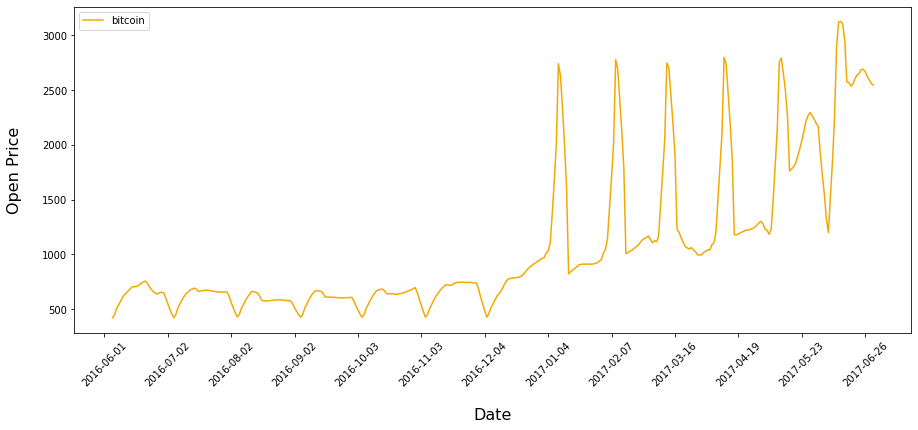

In [177]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

bit = pd.read_csv("BitCoin.csv").sort_values(by="Date", axis=0)
bit = bit[('2016-06-00' < bit.Date) & (bit.Date < '2017-07-00')]
bit_per_5days = bit.Open.rolling(window=5).mean()

plt.figure(figsize=(15, 6))
plt.xticks(np.arange(0, len(bit.Date), len(bit.Date)//12), rotation = 45)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Open Price", fontsize=16, labelpad=20)

plt.plot(bit.Date, bit_per_5days, label='bitcoin', color='#f2a900')
plt.legend()
plt.show()

2016.6 ~ 2017.6 기간에 해당하는 비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 _동시에_ 그려주세요.

- 선의 색깔은 비트코인 : `노란색(#f2a900)`, 이더리움 : `검은색(#3c3c3d)` 으로 해야합니다.
- `x-axis label`과 `y-axis label`은 적절한 텍스트로 추가되어야 합니다.
- 이동평균의 기준은 `Open Column`으로 계산합니다.
- 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

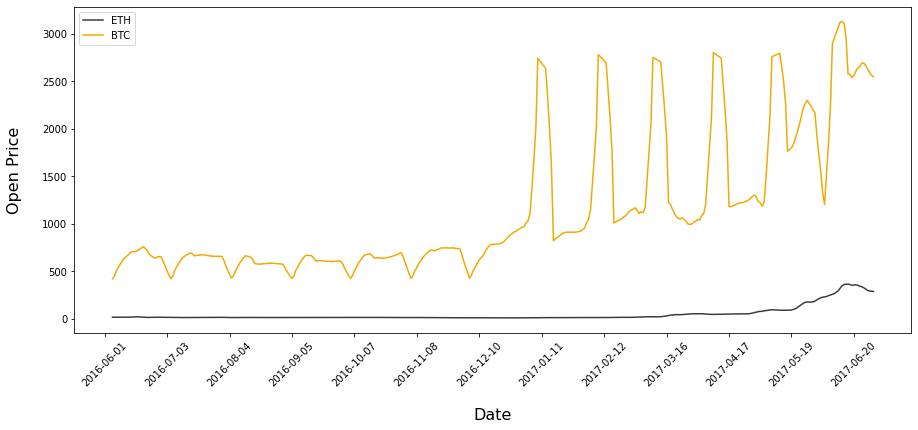

In [202]:
ETH = pd.read_csv("ETH_day.csv").sort_values(by="Date", axis=0)
ETH = ETH[('2016-06-00' < ETH.Date) & (ETH.Date < '2017-07-00')]
ETH_per_5days = ETH.Open.rolling(window=5).mean()

plt.figure(figsize=(15, 6))
plt.xticks(np.arange(0, len(ETH.Date), len(ETH.Date)//12), rotation = 45)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Open Price", fontsize=16, labelpad=20)

plt.plot(ETH.Date, ETH_per_5days, label='ETH', color='#3c3c3d')
plt.plot(bit.Date, bit_per_5days, label='BTC', color='#f2a900')
plt.legend(loc='upper left')
plt.show()

---